## PART-3(RECOGNITION OF TEXT FROM IMAGES)

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### 1. Creating a list containing all the image filenames

In [2]:
%cd '/content/drive/MyDrive/Plates_Crop/Cropped_Img'
#storing all cropped images' names to a list
import subprocess
proc = subprocess.Popen('ls', shell=True, stdout=subprocess.PIPE, )
output = proc.communicate()[0]
output = output.decode('utf-8').split('\n')
output = list(output)

/content/drive/MyDrive/Plates_Crop/Cropped_Img


In [3]:
output

['0.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '10.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '11.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '12.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '13.jpg',
 '140.jpg',
 '141.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '1.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '2.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '3.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.

#### 2. Installing required libraries for supporting Microsoft Computer Vision API

In [4]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install pillow

Requirement already up-to-date: azure-cognitiveservices-vision-computervision in /usr/local/lib/python3.6/dist-packages (0.7.0)


#### 3. Importing Computer Vision Client

In [5]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

In [6]:
from array import array
import os
from PIL import Image
import sys
import time

In [7]:
subscription_key = "ce4ef5776519467db20eb9d2ce8ee6db"
endpoint = "https://swarnenduganguli.cognitiveservices.azure.com/"

#### 4. Creating an OCR model which can read the text from the license plate images

In [8]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

def recognize_characters(x):
  local_image = open(x, "rb")

  ocr_result_local = computervision_client.recognize_printed_text_in_stream(local_image)
  for region in ocr_result_local.regions:
      for line in region.lines:
          print("Bounding box: {}".format(line.bounding_box))
          s = ""
          for word in line.words:
              s += word.text + " "
          print(s)
  print()

#### 5. Using the OCR model created to read the text
<br>

**IMAGE-1**

/content/drive/MyDrive


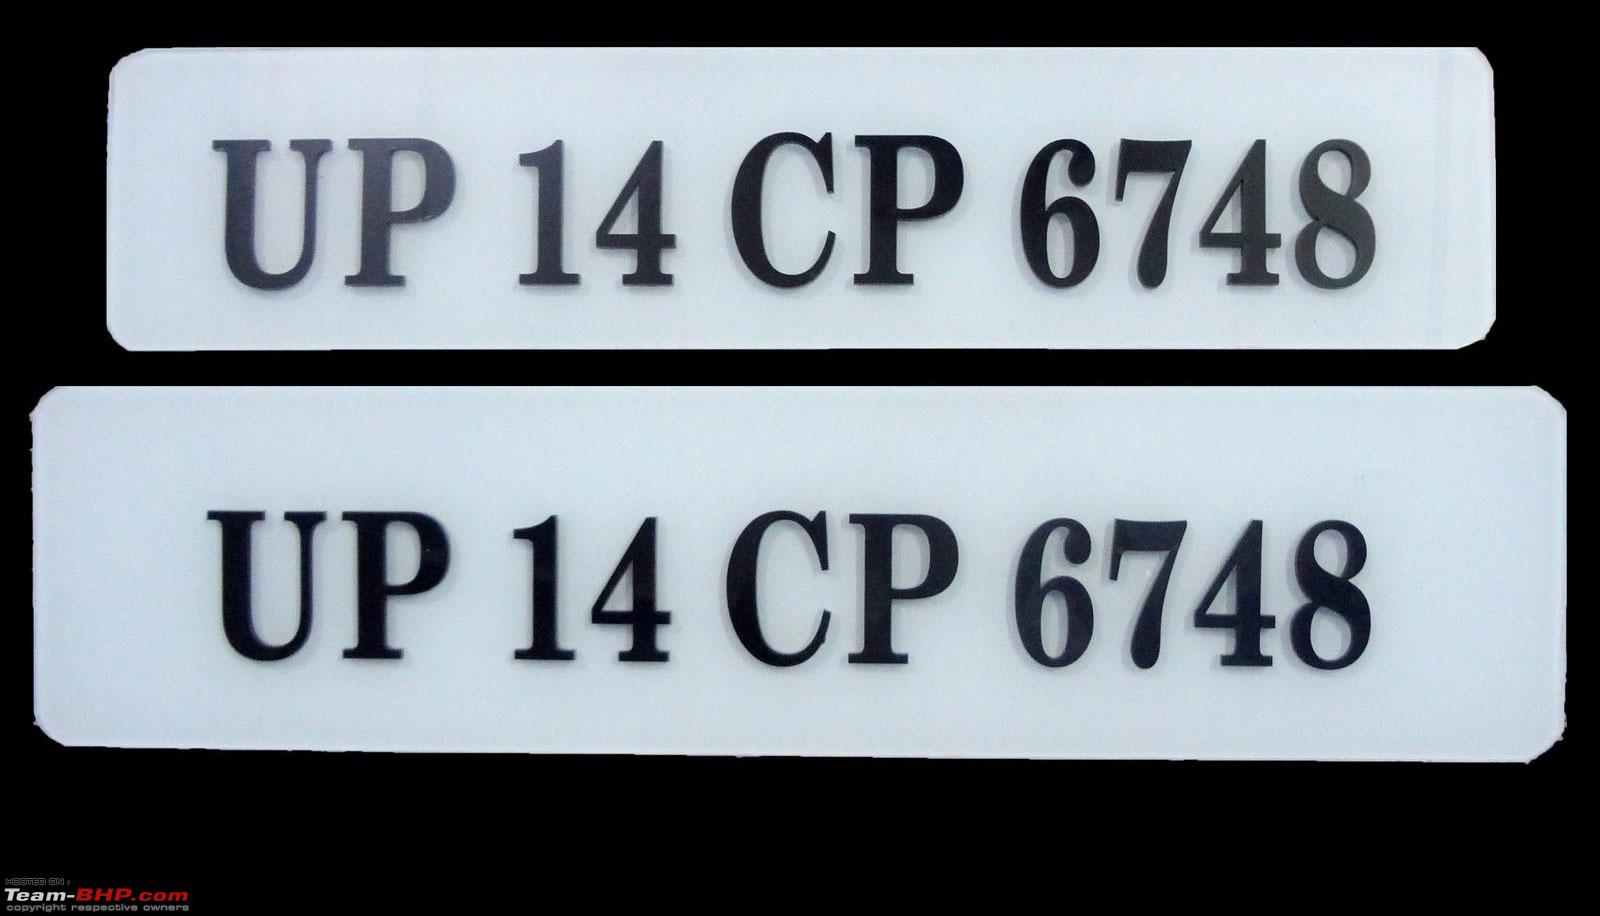

In [9]:
#DEMO-1
%cd '/content/drive/MyDrive'
from IPython.display import Image
Image('Plates_Crop/demo1.jpg')

**READING-1**

In [10]:
recognize_characters('Plates_Crop/demo1.jpg')

Bounding box: 518,132,857,161
14 СР 6748 
Bounding box: 206,510,1165,161
UP 14 СР 6748 



**IMAGE-2**

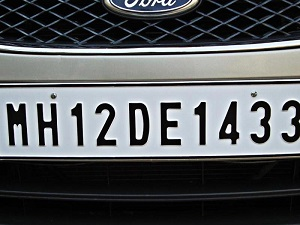

In [11]:
#DEMO-2

Image('Plates_Crop/demo2.jpg')

**READING-2**

In [12]:
recognize_characters('Plates_Crop/demo2.jpg')

Bounding box: 7,100,293,48
NH12DE1433 



**IMAGE-3**

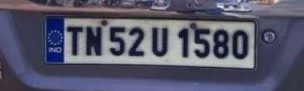

In [13]:
#DEMO-3

Image('Plates_Crop/demo3.jpg')

**READING-3**

In [14]:
recognize_characters('Plates_Crop/demo3.jpg')

Bounding box: 67,20,181,39
Tf52U 1S80 



#### 6. Finally, using the OCR Model for all cropped images 

In [15]:
%cd '/content/drive/MyDrive/Plates_Crop/Cropped_Img'

/content/drive/MyDrive/Plates_Crop/Cropped_Img


In [16]:
for i in output:
  try:
    recognize_characters(i)
  except:
    pass